Desafío Evaluado 5

Descripción
Una consultora internacional radicada en EEUU está buscando analistas, por lo que han
diseñado una prueba que permita poder seleccionar a quienes cuenten con las habilidades
necesarias para crear modelación estadística. Para ello, ponen a disposición de los
interesados una base de datos sobre los precios de las viviendas en Boston, utilizada en el
paper Harrison Jr, D., & Rubinfeld, D. L. (1978). Hedonic housing prices and the demand for
clean air. Journal of environmental economics and management, 5(1), 81-102.
El objetivo del ejercicio de captación de talento es desarrollar un modelo predictivo para el
valor mediano de las casas mediante el entrenamiento de un modelo de regresión lineal.
● crim : Tasa de criminalidad por sector de Boston.
● zn proporción de terreno residencial asignado para terrenos baldíos.
● indus proporción de negocios no asociados al comercio por sector.
● chas Dummy. 1 si el sector colinda con el río Charles, 0 de lo contrario.
● nox Concentración de dióxido de carbono.
● rm cantidad promedio de habitaciones por casa.
● age proporción de casas construidas antes de 1940.
● dis distancia promedio a cinco centros de empleos.
● rad índice de accesibilidad a autopistas.
● tax nivel de impuestos asociados a viviendas.
● ptratio razón alumno:profesor por sector de Boston.
● black proporción de afroamericanos por sector de Boston.
● lstat porcentaje de población de estratos bajos.
● medv valor mediano de las casas.

1. Preparar el ambiente de trabajo (1 puntos)
● Importe las librerías básicas para el análisis de datos.
● Importe el módulo linear_model , y las funciones mean_squared_error,r2_score y train_test_split .
● Importe la base de datos boston.csv y elimine la columna Unnamed: 0 .
● Obtenga las medidas descriptivas de la base de datos con .describe() .


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

plt.style.use('seaborn-whitegrid') # Gráficos estilo seaborn
plt.rcParams["figure.figsize"] = (6, 4) # Tamaño gráficos
plt.rcParams["figure.dpi"] = 100 # resolución gráficos

In [2]:
df = pd.read_csv('./boston.csv', index_col = 0)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
print("La base de datos tiene ", df.shape[0], "observaciones y ",df.shape[1], " columnas")
print("Las variables de la base de datos son ", df.columns)


La base de datos tiene  506 observaciones y  14  columnas
Las variables de la base de datos son  Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')


In [4]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


2. Dividir la muestra (1 puntos)
● Genere conjuntos de entrenamiento y pruebas con train_test_split .
● Reserve un 33% de la muestra para el conjunto de pruebas.
● Incluya una semilla pseudoaleatoria a su elección, esto lo puede hacer con el
argumento random_state dentro del método train_test_plit

In [5]:
y = df['medv']
X = df.drop('medv', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state= 44)

X_train, X_test, y_train, y_test

(         crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
 471   4.34879   0.0  18.10     0  0.580  6.167  84.0  3.0334   24  666   
 237   0.52058   0.0   6.20     1  0.507  6.631  76.5  4.1480    8  307   
 70    0.12816  12.5   6.07     0  0.409  5.885  33.0  6.4980    4  345   
 126   0.16902   0.0  25.65     0  0.581  5.986  88.4  1.9929    2  188   
 422   7.02259   0.0  18.10     0  0.718  6.006  95.3  1.8746   24  666   
 ..        ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
 60    0.10328  25.0   5.13     0  0.453  5.927  47.2  6.9320    8  284   
 174   0.09178   0.0   4.05     0  0.510  6.416  84.1  2.6463    5  296   
 242   0.10612  30.0   4.93     0  0.428  6.095  65.1  6.3361    6  300   
 420  11.81230   0.0  18.10     0  0.718  6.824  76.5  1.7940   24  666   
 277   0.10469  40.0   6.41     1  0.447  7.267  49.0  4.7872    4  254   
 
      ptratio   black  lstat  
 471     20.2  396.90  16.29  
 237     17.4  388.45   9.54  
 70  

3. Generar modelos (2 puntos)
● Ahora implementaremos dos versiones del modelo lineal:
○ Con intercepto.
○ Sin intercepto.
● Cada versión debe generarse en un nuevo objeto inicializado.
● Posteriormente se deben entrenar los modelos especificando la matriz y vector
de entrenamiento.
● Con los modelos entrenados, genere una predicción de la matriz de pruebas con
el método .predict().


In [7]:
#Primero el modelo con Intercepto

modelo_intercepto = linear_model.LinearRegression(fit_intercept = True)
modelo_intercepto.fit(X_train, y_train)
predic_train_intercepto = modelo_intercepto.predict(X_train)
predic_test_intercepto = modelo_intercepto.predict(X_test)

mse_train = mean_squared_error(y_train,predic_train_intercepto)
mse_test = mean_squared_error(y_test,predic_test_intercepto)

r2_train = r2_score(y_train,predic_train_intercepto)
r2_test = r2_score(y_test,predic_test_intercepto)

print(f'El mean_squared_error del train con intercepto es: {mse_train}, \n y el mean_squared_error para el test con intercepto es : {mse_test}')
print('-'*80)
print(f'El r cuadrado score para el train con intercepto es: {r2_train}, \n y el r cuadrado score para el test con intercepto es: {r2_test}')

El mean_squared_error del train con intercepto es: 20.05744029199928, 
 y el mean_squared_error para el test con intercepto es : 27.593562379656394
--------------------------------------------------------------------------------
El r cuadrado score para el train con intercepto es: 0.7391405291456344, 
 y el r cuadrado score para el test con intercepto es: 0.71945742430205


In [8]:
#Ahora sin intercepto

modelo_no_intercepto = linear_model.LinearRegression(fit_intercept = False)
modelo_no_intercepto.fit(X_train, y_train)
predic_train_no_intercepto = modelo_no_intercepto.predict(X_train)
predic_test_no_intercepto = modelo_no_intercepto.predict(X_test)

mse_train2 = mean_squared_error(y_train,predic_train_no_intercepto)
mse_test2 = mean_squared_error(y_test,predic_test_no_intercepto)

r2_train2 = r2_score(y_train,predic_train_no_intercepto)
r2_test2 = r2_score(y_test,predic_test_no_intercepto)

print(f'El mean_squared_error del train sin intercepto es: {mse_train2}, \n y el mean_squared_error para el test sin intercepto es : {mse_test2}')
print('-'*80)
print(f'El r cuadrado score para el train sin intercepto es: {r2_train2}, \n y el r cuadrado score para el test sin intercepto es: {r2_test2}')


El mean_squared_error del train sin intercepto es: 22.77533328463743, 
 y el mean_squared_error para el test sin intercepto es : 28.692826388894836
--------------------------------------------------------------------------------
El r cuadrado score para el train sin intercepto es: 0.703792642397534, 
 y el r cuadrado score para el test sin intercepto es: 0.7082812538503809


4. Obtención de métricas (1 puntos)
● Ahora generaremos una función llamada report_scores que ingrese como
argumentos el vector de datos predichos y el vector de datos por validar.
● La función debe imprimir las métricas del Error Cuadrático Promedio y R2.
● Reporte las métricas para ambos modelos. En base a ello, seleccione el mejor modelo.

In [9]:
def report_score(modelo, y_test, prediccion_test):
    
    mse = mean_squared_error(y_test,prediccion_test).round(4)
    r2 = r2_score(y_test,prediccion_test).round(4)    
    print(f'Modelo {modelo}:')
    print(f'El error cuadratico promedio del modelo {modelo} es: {mse}')
    print(f'El R2 del modelo {modelo} es: {r2}')
                   
    return mse, r2

In [10]:
#revisamos la función con intercepto
mse_intercepto, r2_intercepto = report_score('con intercepto',y_test, predic_test_intercepto)

Modelo con intercepto:
El error cuadratico promedio del modelo con intercepto es: 27.5936
El R2 del modelo con intercepto es: 0.7195


In [11]:
#Ahora revisamos sin intercepto
mse_no_intercepto, r2_no_intercepto = report_score ('sin intercepto',y_test, predic_test_no_intercepto)

Modelo sin intercepto:
El error cuadratico promedio del modelo sin intercepto es: 28.6928
El R2 del modelo sin intercepto es: 0.7083


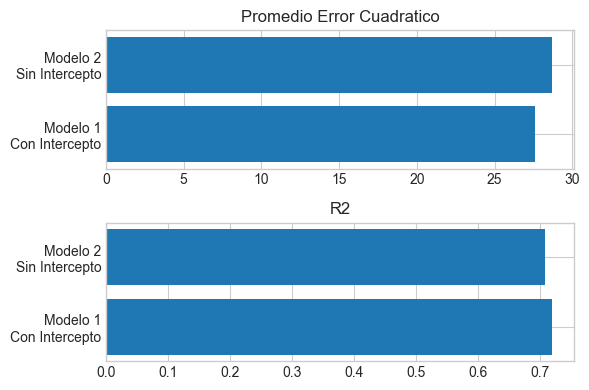

In [12]:
#Para escoger el mejor modelo, heremos los gráficos

labels = ['Modelo 1\nCon Intercepto', 'Modelo 2\nSin Intercepto']
plt.subplot(2,1,1)
plt.barh(labels,[mse_intercepto,mse_no_intercepto])
plt.title('Promedio Error Cuadratico')
plt.subplot(2,1,2)
plt.barh(labels,[r2_intercepto,r2_no_intercepto])
plt.title('R2')
plt.tight_layout()


In [ ]:
#Se acercan mucho los modelos con y sin intercepto

5. Refactorización del modelo (1 puntos)
● Genere una función llamada fetch_features que ingrese como argumentos la
base de datos y el nombre del vector objetivo. El nombre del vector debe ser medv por defecto.
● La función debe retornar una lista con las correlaciones entre cada atributo y el
vector objetivo y su nombre.
● Reporte brevemente cuales son los 6 atributos con una mayor correlación
absoluta con medv (de mayor a menor correlación).


,Correlacion,Corr. Absoluta
Atributo,,
lstat,-0.74,0.74
rm,0.70,0.70
ptratio,-0.51,0.51
indus,-0.48,0.48
tax,-0.47,0.47
nox,-0.43,0.43
crim,-0.39,0.39
rad,-0.38,0.38
age,-0.38,0.38


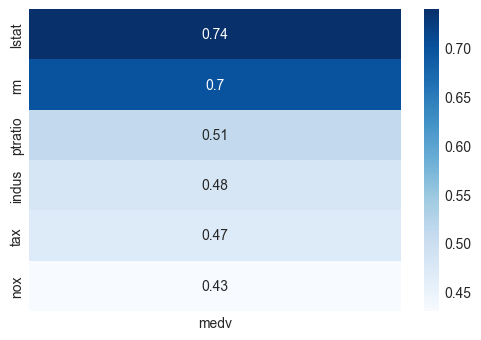

In [13]:
def fetch_features(df, vector_obj = 'medv'):
    columnas = df.columns
    nomb_atrib,corr_atrib,corr_atrib_abs = [],[],[]
    for col in columnas:
        if col != vector_obj:
            nomb_atrib.append(col)
            corr_atrib.append(df[col].corr(df[vector_obj]))
            corr_atrib_abs.append(abs(df[col].corr(df[vector_obj])))
            
    tabla = pd.DataFrame({'Atributo':nomb_atrib,'Correlacion':corr_atrib,'Corr. Absoluta':corr_atrib_abs})   
    tabla = tabla.set_index('Atributo')
    tabla = tabla.sort_values(by =['Corr. Absoluta'],ascending = False).round(2)
    
    cor = abs(pd.get_dummies(df, drop_first = True).corr().round(2))
    top_6 = cor['medv'].sort_values(ascending = False)[1:-7]
    sns.heatmap(cor.loc[:,['medv']].sort_values(by = 'medv',ascending = False)[1:-7],annot= True, cmap='Blues')
    return tabla

fetch_features(df) 


6. Refactorización del modelo predictivo (2 puntos)
● Genere otros conjuntos de entrenamiento y validación en base a una matriz con
los 6 atributos identificados en el ejercicio anterior, y el vector objetivo.
● Entrene un modelo en base al mejor desempeño.
● Reporte las métricas para el nuevo modelo.

In [14]:
cols = ['lstat', 'rm','ptratio', 'indus', 'tax', 'nox' ]
y = df['medv']
X = df.loc[:,cols]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.33,random_state= 44)

In [15]:
model= linear_model.LinearRegression()
model.fit(X_train1, y_train1)
pred_test= model.predict(X_test1)

In [16]:
mse_test2 = mean_squared_error(y_test,pred_test)
r2_test2 = r2_score(y_test,pred_test)

mse_test2,r2_test2

(31.214169745782097, 0.6826468631244641)

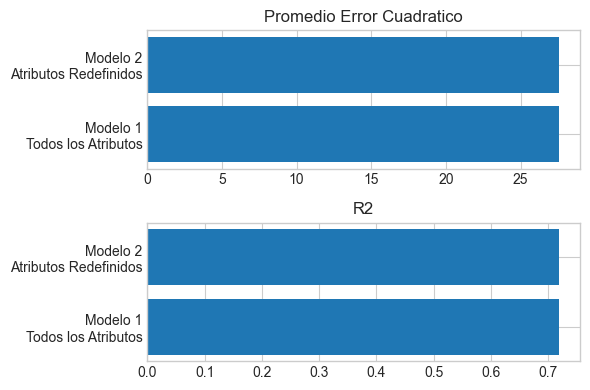

In [17]:
labels = ['Modelo 1\nTodos los Atributos', 'Modelo 2\nAtributos Redefinidos']
plt.subplot(2,1,1)
plt.barh(labels,[mse_intercepto,mse_test])
plt.title('Promedio Error Cuadratico')
plt.subplot(2,1,2)
plt.barh(labels,[r2_intercepto,r2_test])
plt.title('R2')
plt.tight_layout()

7. Predicción de casos (2 puntos): A continuación se generaron dos arrays que
representan el peor escenario posible (worst_neighbor) y el mejor escenario
posible (best_neighbor). Las variables representan, para cada caso, los valores de
los siguientes atributos (en el mismo orden entregado): 'lstat', 'rm','ptratio', 'indus', 'tax', 'nox'.


In [18]:
worst_neighbor = np.array([37.9, 12.6, 3.5, 27.7, 187, 0.87]).reshape(1,-1)
best_neighbor = np.array([1.73, 22, 8.7, 0.46, 711, 0.38]).reshape(1,-1)

model= linear_model.LinearRegression()
model.fit(X_train1, y_train1)
predict_worst_neighbor= model.predict(worst_neighbor)
predict_best_neighbor= model.predict(best_neighbor)

print(f'Pronostico worst_neighbor: {predict_worst_neighbor[0]}')
print(f'Pronostico best_neighbor: {predict_best_neighbor[0]}')      

Pronostico worst_neighbor: 50.34432264997732
Pronostico best_neighbor: 100.63570180961366


C:\Users\arlen\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\arlen\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
